In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split


In [19]:
# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Combine train and test for custom split
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Filter only even digits (0, 2, 4, 6, 8)
even_mask = np.isin(y, [0, 2, 4, 6, 8])
x = x[even_mask]
y = y[even_mask]

# Normalize and reshape
x = x / 255.0
x = x.reshape(-1, 28, 28, 1)

# Map labels to 0-4 for categorical use
label_map = {0: 0, 2: 1, 4: 2, 6: 3, 8: 4}
y = np.array([label_map[label] for label in y])

# Train-test split: 85% train, 15% val from training set
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=42, stratify=y)

# One-hot encode
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=5)


In [20]:
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), name='conv1'))
    model.add(layers.MaxPooling2D((2,2)))
    
    model.add(layers.Conv2D(64, (3,3), activation='relu', name='conv2'))
    model.add(layers.MaxPooling2D((2,2)))
    
    model.add(layers.Conv2D(128, (3,3), activation='relu', name='conv3'))
    model.add(layers.Flatten())
    
    model.add(layers.Dense(128, activation='relu', name='dense1'))
    model.add(layers.Dense(5, activation='softmax', name='output'))
    
    return model


In [21]:
model = build_model()
optimizer = optimizers.Adagrad(learning_rate=0.003)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ModelCheckpoint callback
checkpoint = callbacks.ModelCheckpoint("best_model.h5", monitor="val_loss", save_best_only=True, verbose=1)


In [22]:
history1 = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint]
)


Epoch 1/10
914/915 [============================>.] - ETA: 0s - loss: 0.4524 - accuracy: 0.8937
Epoch 1: val_loss improved from inf to 0.13991, saving model to best_model.h5
915/915 [==============================] - 27s 29ms/step - loss: 0.4522 - accuracy: 0.8937 - val_loss: 0.1399 - val_accuracy: 0.9549
Epoch 2/10
913/915 [============================>.] - ETA: 0s - loss: 0.1114 - accuracy: 0.9671
Epoch 2: val_loss improved from 0.13991 to 0.09313, saving model to best_model.h5
915/915 [==============================] - 27s 30ms/step - loss: 0.1113 - accuracy: 0.9671 - val_loss: 0.0931 - val_accuracy: 0.9698
Epoch 3/10
913/915 [============================>.] - ETA: 0s - loss: 0.0790 - accuracy: 0.9762
Epoch 3: val_loss improved from 0.09313 to 0.09109, saving model to best_model.h5
915/915 [==============================] - 26s 29ms/step - loss: 0.0790 - accuracy: 0.9762 - val_loss: 0.0911 - val_accuracy: 0.9700
Epoch 4/10
914/915 [============================>.] - ETA: 0s - loss: 0

In [23]:
#  Saves the model with the lowest validation loss.
checkpoint = ModelCheckpoint(
    'best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

optimizer = Adagrad(learning_rate=0.003)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [24]:
history2 = model.fit(
    x_train, y_train,
    epochs=20,
    initial_epoch=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint]
)


Epoch 11/20
915/915 [==============================] - 28s 29ms/step - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.0328 - val_accuracy: 0.9897
Epoch 12/20
915/915 [==============================] - 26s 29ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0327 - val_accuracy: 0.9899
Epoch 13/20
915/915 [==============================] - 26s 28ms/step - loss: 0.0251 - accuracy: 0.9918 - val_loss: 0.0318 - val_accuracy: 0.9899
Epoch 14/20
915/915 [==============================] - 27s 29ms/step - loss: 0.0232 - accuracy: 0.9928 - val_loss: 0.0315 - val_accuracy: 0.9899
Epoch 15/20
915/915 [==============================] - 31s 34ms/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 0.0289 - val_accuracy: 0.9903
Epoch 16/20
915/915 [==============================] - 27s 29ms/step - loss: 0.0205 - accuracy: 0.9929 - val_loss: 0.1160 - val_accuracy: 0.9628
Epoch 17/20
915/915 [==============================] - 27s 30ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0291 - val_ac

In [25]:
for layer in model.layers:
    if layer.name in ['conv1', 'conv2', 'conv3']:
        layer.trainable = False

# Recompile with same optimizer
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [26]:
history2 = model.fit(
    x_train, y_train,
    epochs=20,
    initial_epoch=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint]
)


Epoch 11/20
915/915 [==============================] - 11s 12ms/step - loss: 0.0143 - accuracy: 0.9960 - val_loss: 0.0240 - val_accuracy: 0.9928
Epoch 12/20
915/915 [==============================] - 11s 11ms/step - loss: 0.0139 - accuracy: 0.9961 - val_loss: 0.0235 - val_accuracy: 0.9924
Epoch 13/20
915/915 [==============================] - 10s 11ms/step - loss: 0.0136 - accuracy: 0.9961 - val_loss: 0.0239 - val_accuracy: 0.9921
Epoch 14/20
915/915 [==============================] - 10s 11ms/step - loss: 0.0133 - accuracy: 0.9963 - val_loss: 0.0238 - val_accuracy: 0.9923
Epoch 15/20
915/915 [==============================] - 10s 11ms/step - loss: 0.0132 - accuracy: 0.9961 - val_loss: 0.0232 - val_accuracy: 0.9923
Epoch 16/20
915/915 [==============================] - 10s 11ms/step - loss: 0.0128 - accuracy: 0.9964 - val_loss: 0.0228 - val_accuracy: 0.9924
Epoch 17/20
915/915 [==============================] - 12s 13ms/step - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.0229 - val_ac

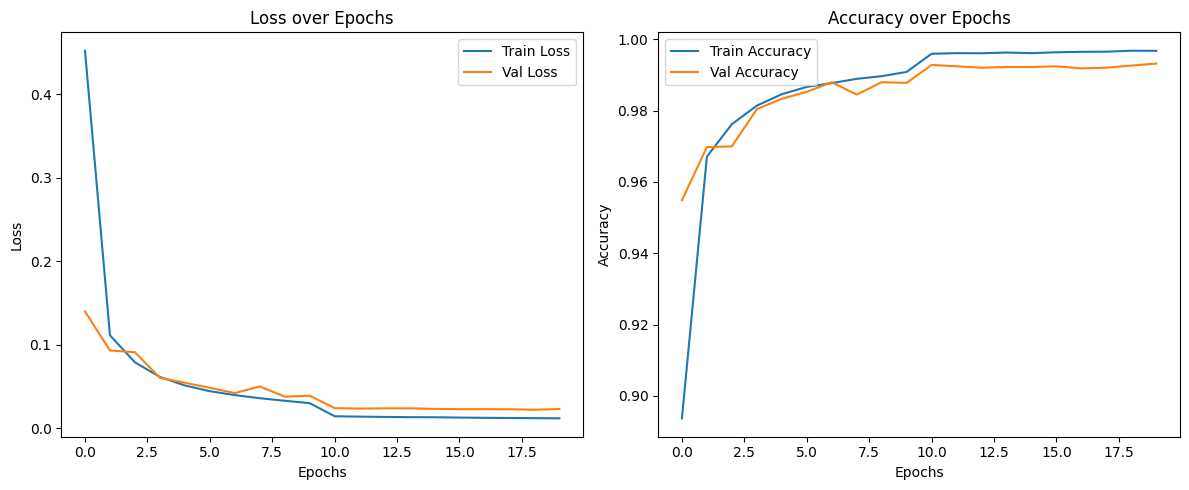

In [27]:
# Combine histories
history = {}
for key in history1.history:
    history[key] = history1.history[key] + history2.history[key]

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [28]:
best_model = tf.keras.models.load_model("best_model.h5")
val_loss, val_acc = best_model.evaluate(x_val, y_val)
print(f"Best Model Validation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")


162/162 [==============================] - 2s 10ms/step - loss: 0.0222 - accuracy: 0.9926
Best Model Validation Accuracy: 0.9926, Validation Loss: 0.0222
